In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
df.shape

(10000, 2)

In [6]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


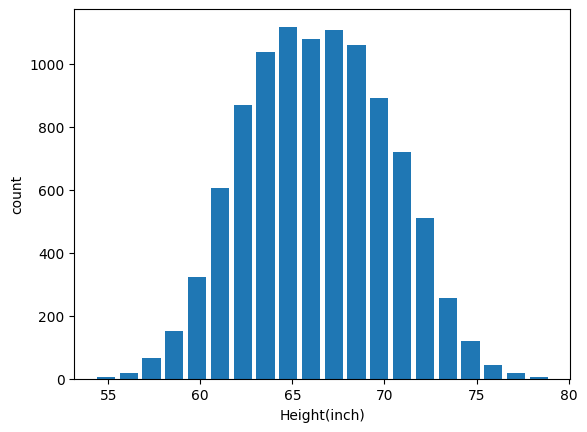

In [ ]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel("Height(inch)")
plt.ylabel("count")
plt.show()

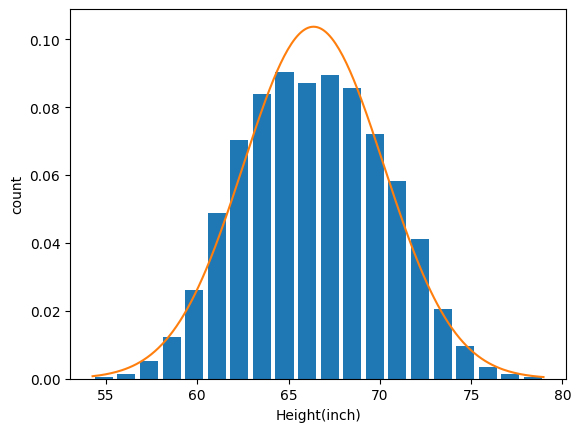

In [14]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel("Height(inch)")
plt.ylabel("count")

rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [16]:
df.height.mean()

66.367559754866

In [17]:
df.height.std()

3.847528120795573

In [18]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725271

In [19]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

Outlier based on Standard deviation value 3

In [21]:
df[(df.height<lower_limit) | (df.height>upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


New dataframe without outlier

In [23]:
df_std=df[(df.height<upper_limit) & (df.height>lower_limit)]
df_std.shape

(9993, 2)

A z-score measures how many standard deviations a data point is from the mean of a dataset

In [25]:
df['Z_score']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Manually we can calculate and check wheather it is right or not

In [27]:
(73.847017-66.367559754866)/3.847528120795573

1.9439642831219734

In [28]:
df[df.Z_score>3]    #3 is as a standard deviation

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [29]:
df[df.Z_score<-3]

,gender,height,Z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


All outliers for the dataframe listed here which based on z score less than -3 and greater than 3

In [32]:
df[(df.Z_score<-3)|((df.Z_score>3))]

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


New dataframe without outlier

In [30]:
df_zScore=df[(df.Z_score>-3)&(df.Z_score<3)]
df_zScore.head()

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [31]:
df_zScore.shape

(9993, 3)